# Lab7



## K-means clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np


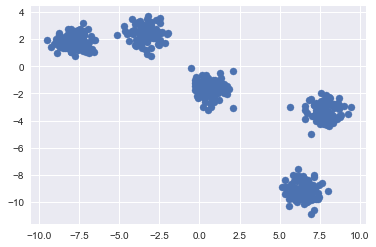

In [14]:
from sklearn.datasets.samples_generator import make_blobs

# Use sklearn.datasets.samples_generator to generate 5 blobs using 500 samples.
# fix to generate 5 blobs using 500 samples instead of original
X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.60, random_state=6)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [22]:
# k means clustering by sklearn
# Create a k-means clustering model using k = 5.
from sklearn.cluster import KMeans
# set random state=0 to always get same result
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X)
center = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)

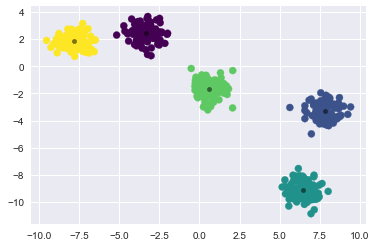

In [23]:
# Plot a scatter plot of the output of the k-means model.
plt.scatter(X[:, 0], X[:,1], c=y_kmeans, s=50, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=20, alpha=0.5)

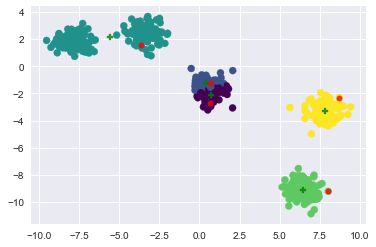

In [40]:
# Use Expectation-Maximization to create another k-means model using k = 5.
from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[: n_clusters]
    center_orig = X[i]
    centers = X[i]

    while True:
        # 2.a Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2.b Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # 2.c Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return center_orig,centers, labels

center_orig, centers, labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], c="green", s=30, alpha=0.8, marker="P")
plt.scatter(center_orig[:,0], center_orig[:,1], c="red",s=30, alpha=0.8)

### Question 1

Was the Expectation-Maximization k-means model an improvement over the k-means clustering model ? Explain how the E-M model improved the k-means model.

I think Expectation–maximization might improve results basically. As the plot above shows, the initial centers(red dot) move to final convergence(green "+" marker). It means that criteria dots move to better points to optimise criteria function.

But, as the graph shows, it still strongly depend first state. So, if the first state is worse, result could not goes well.


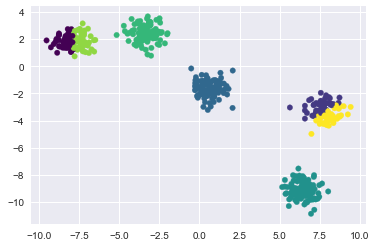

In [44]:
# Using the same dataset, create a k-means clustering model using k = 7.
labels_7 = KMeans(7, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=30, cmap='viridis')

In [46]:
# Compare the Silhouette scores for the k-means clustering model using k = 5 (first model)
# and the k-means clustering model using k = 7.
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

k_5_silhouette_avg = silhouette_score(X, y_kmeans)
k_7_silhouette_avg = silhouette_score(X, labels_7)
print("silhouette score(k=5):",k_5_silhouette_avg)
print("silhouette score(k=7):",k_7_silhouette_avg)

silhouette score(k=5): 0.802100473207
silhouette score(k=7): 0.6091878414


### Question 2

Which Silhouette score is better? Why?

Silhouette score(k = 5) is better than (k = 7). Because high silhouette score means that items in a cluster are separated from the other clusters well.

## Gaussian Mixture Model

In [62]:
from sklearn.mixture import GaussianMixture
rng = np.random.RandomState(13)
X_streatched = np.dot(X, rng.randn(2,2))

gmm = GaussianMixture(n_components=5).fit(X_streatched)  # Use GaussianMixture instead of GMM which use in example code.
labels = gmm.predict(X_streatched)
# plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [63]:
# show top 5 items' probability
probs = gmm.predict_proba(X)
print(probs[:5].round(10))

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   9.99999998e-01   0.00000000e+00   1.80000000e-09
    0.00000000e+00]
 [  1.85700000e-07   6.03414460e-02   0.00000000e+00   9.39658368e-01
    0.00000000e+00]]


full


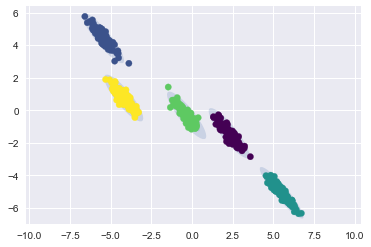

In [70]:
# show gausian distribution ellipse


from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

plot_gmm(gmm, X_streatched)
# print(dir(gmm))
print(gmm.covariance_type)

# Find the probabilistic cluster assignments in a matrix of size  [n_samples, n_clusters]  
# which measures the probability that any point belongs to the given cluster.
# I think I already done?

### Question 3

Explain what covariance_type option you selected and what pattern(s) can the covariance_type option represent?

There is 3 covariance_type in GaussianMixture().
One is "diag", which draw ellipse constrained to align with the axis.
The other is "spherical", which constrains the shape of the cluster such that all dimensions are equal. 
Another is "full", which draw ellipse with arbitrary orientation.

I use "full" covariance_type. Because, the data tend to be ellipse and it seems tilting.
So, it is more suitable than "diag" and "spherical" covariance_type.

## k-means Mini-batch Model

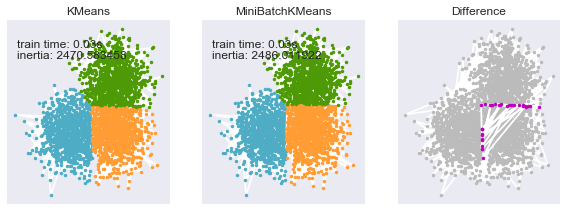

In [74]:
# Generate sample data for the dataset
from sklearn.cluster import MiniBatchKMeans
import time
np.random.seed(0)
batch_size = 45
centers = [[1,1],[-1,-1],[1,-1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

# Create a k-means model with k = 3 and a MiniBatchKMeans model with k = 3.
k_means = KMeans(n_clusters=n_clusters, random_state=10)
mbk = MiniBatchKMeans(init="k-means++", n_clusters=n_clusters, random_state=10, batch_size=batch_size)

t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

# Plot the outputs of both models, and plot the points that are different between the two models.
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

### Question 4

What is the advantage of creating a k-means mini-batch model compared to a k-means model?

Using mini-batch learning(sampling data to decrease computational cost), it is much faster than KMeans.

## DBSCAN

In [81]:
# Take the same dataset as the used for the initial k-means model and create a DBSCAN model.

from sklearn.cluster import DBSCAN
from sklearn import metrics

# generate X same as Question1
X, labels_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.60, random_state=6)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [83]:
# 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 6
Homogeneity: 0.508
Completeness: 0.518
V-measure: 0.513
Adjusted Rand Index: 0.194
Adjusted Mutual Information: 0.501
Silhouette Coefficient: -0.043


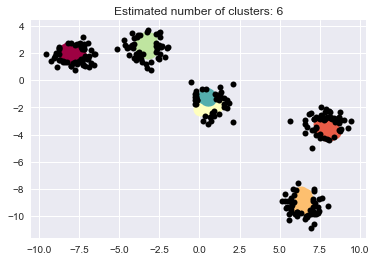

In [84]:

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
